# Backtest QQQ AAPL BAC

## Load data

In [44]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from pandas_datareader import data as pdr


In [45]:
prediction_path_QQQ = "./data/QQQ_prediction.csv"
prediction_path_AAPL = "./data/AAPL_prediction.csv"
prediction_path_BAC = "./data/BAC_prediction.csv"

pred_QQQ = pd.read_csv(prediction_path_QQQ)
pred_AAPL = pd.read_csv(prediction_path_AAPL)
pred_BAC = pd.read_csv(prediction_path_BAC)

pred_QQQ['rec_date'] = pd.to_datetime(pred_QQQ['rec_date'])
pred_AAPL['rec_date'] = pd.to_datetime(pred_AAPL['rec_date'])
pred_BAC['rec_date'] = pd.to_datetime(pred_BAC['rec_date'])

In [46]:
def get_finance_data(code, start_date, end_date):
    yf.pdr_override()

    data_frame = pdr.get_data_yahoo(code, start=start_date, end=end_date)

    data_frame = data_frame.rename_axis('rec_date').reset_index()
    data_frame = data_frame.rename(columns = {'Open': 'open', 'High':'high', 'Low' :'low', 'Close': 'close',
                                              'Adj Close': 'adj_close', 'Volume': 'volume'})
    #Drop Columns
    data_frame = data_frame.drop(columns = ['adj_close'])
    data_frame['rec_date'] = pd.to_datetime(data_frame['rec_date'])

    return data_frame  

In [47]:
pred_QQQ.head(5)

,rec_date,open,high,low,close,volume,weekday,month,holiday,close_change,volume_change,price_gap,is_closed_by_high,is_closed_by_low,up_down,predict
0,2010-01-16,0.022167,0.021719,0.022654,0.019729,0.426044,6,1,0,0.000000,0.000000,0.041430,0,1,1,1.0
1,2010-01-17,0.022167,0.021719,0.022654,0.019729,0.426044,7,1,0,0.000000,0.000000,0.041430,0,1,1,1.0
2,2010-01-18,0.022167,0.021719,0.022654,0.019729,0.426044,1,1,1,0.000000,0.000000,0.041430,0,1,1,1.0
3,2010-01-19,0.019199,0.022243,0.024406,0.024049,0.275002,2,1,0,0.016140,-0.334737,0.029512,1,0,1,1.0
4,2010-01-20,0.020945,0.022010,0.021370,0.020138,0.493028,3,1,0,-0.014381,0.726308,0.056754,0,0,0,0.0


### Get 2019 data

In [48]:
START_DATE = '2019-01-01'
END_DATE = '2019-12-31'

pred_QQQ = pred_QQQ[(pred_QQQ['rec_date'] >= START_DATE) & (pred_QQQ['rec_date']<= END_DATE)]
pred_AAPL = pred_AAPL[(pred_AAPL['rec_date'] >= START_DATE) & (pred_AAPL['rec_date']<= END_DATE)]
pred_BAC = pred_BAC[(pred_QQQ['rec_date'] >= START_DATE) & (pred_BAC['rec_date']<= END_DATE)]

### Remove holiday days

In [49]:
pred_QQQ = pred_QQQ[pred_QQQ['holiday']==0]
pred_AAPL = pred_AAPL[pred_AAPL['holiday']==0]
pred_BAC = pred_BAC[pred_BAC['holiday']==0]

In [50]:
pred_QQQ.head(5)

,rec_date,open,high,low,close,volume,weekday,month,holiday,close_change,volume_change,price_gap,is_closed_by_high,is_closed_by_low,up_down,predict
3273,2019-01-02,0.630265,0.657564,0.637064,0.656141,0.183186,3,1,0,0.004019,0.104902,0.266742,1,0,1,1.0
3274,2019-01-03,0.639632,0.643065,0.628948,0.626605,0.240967,4,1,0,-0.032670,0.277303,0.204313,0,1,0,0.0
3275,2019-01-04,0.638120,0.664842,0.642086,0.664021,0.240572,5,1,0,0.042785,-0.001482,0.288876,1,0,1,1.0
3276,2019-01-05,0.638120,0.664842,0.642086,0.664021,0.240572,6,1,0,0.000000,0.000000,0.288876,1,0,1,1.0
3277,2019-01-06,0.638120,0.664842,0.642086,0.664021,0.240572,7,1,0,0.000000,0.000000,0.288876,1,0,1,0.0


In [51]:
price_QQQ = get_finance_data("QQQ", START_DATE, END_DATE)
price_AAPL = get_finance_data("AAPL", START_DATE, END_DATE)
price_BAC = get_finance_data("BAC", START_DATE, END_DATE)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [52]:
price_QQQ.head(5)

,rec_date,open,high,low,close,volume
0,2018-12-31,154.470001,154.979996,152.710007,154.259995,53015300
1,2019-01-02,150.990005,155.750000,150.880005,154.880005,58576700
2,2019-01-03,152.600006,153.259995,149.490005,149.820007,74820200
3,2019-01-04,152.339996,157.000000,151.740005,156.229996,74709300
4,2019-01-07,156.619995,158.860001,156.110001,158.089996,52059300


### Get necessary fields only

In [53]:
fields_list = ['rec_date', 'predict']
pred_QQQ_ = pred_QQQ[fields_list]
pred_AAPL_ = pred_AAPL[fields_list]
pred_BAC_ = pred_BAC[fields_list]

In [54]:
pred_QQQ_.head(5)

,rec_date,predict
3273,2019-01-02,1.0
3274,2019-01-03,0.0
3275,2019-01-04,1.0
3276,2019-01-05,1.0
3277,2019-01-06,0.0


### Combine dfs together

In [204]:
combined_QQQ = pd.merge(pred_QQQ_, price_QQQ, how='inner', left_on='rec_date', right_on='rec_date')
combined_QQQ['code'] = "QQQ"
combined_AAPL = pd.merge(pred_AAPL_, price_AAPL, how='inner', left_on='rec_date', right_on='rec_date')
combined_AAPL['code'] = "AAPL"
combined_BAC = pd.merge(pred_BAC_, price_BAC, how='inner', left_on='rec_date', right_on='rec_date')
combined_BAC['code'] = "BAC"

In [205]:
combined_QQQ.head(10)

,rec_date,predict,open,high,low,close,volume,code
0,2019-01-02,1.0,150.990005,155.750000,150.880005,154.880005,58576700,QQQ
1,2019-01-03,0.0,152.600006,153.259995,149.490005,149.820007,74820200,QQQ
2,2019-01-04,1.0,152.339996,157.000000,151.740005,156.229996,74709300,QQQ
3,2019-01-07,0.0,156.619995,158.860001,156.110001,158.089996,52059300,QQQ
4,2019-01-08,1.0,159.539993,160.110001,157.199997,159.520004,49388700,QQQ
5,2019-01-09,0.0,160.139999,161.520004,159.470001,160.820007,46491700,QQQ
6,2019-01-10,0.0,159.600006,161.369995,158.699997,161.279999,38943400,QQQ
7,2019-01-11,1.0,160.330002,160.860001,159.789993,160.690002,30176600,QQQ
8,2019-01-14,1.0,159.330002,159.960007,158.589996,159.270004,30710200,QQQ
9,2019-01-15,0.0,160.000000,162.600006,159.910004,162.380005,40874200,QQQ


## Strategy 1: All in when meets buy signal once

In [206]:
import plotly.graph_objects as go

class ColourScheme(object):
    INCREASING_COLOR = '#4caf50'
    INCREASING_DARK_COLOR = '#1b5e20'
    DECREASING_COLOR = '#f44336'
    DECREASING_DARK_COLOR = '#b71c1c'


class SignalSymbol(object):
    BUY = 'triangle-up'
    SELL = 'triangle-down'
    

In [207]:
class Candlesticks(object):
    def __init__(self, x, state_field):
        self.x = x
        self.state_field = state_field

    @classmethod
    def _range_selector(cls):
        return dict(
            visible=True,
            x=0, y=0.9,
            bgcolor='rgba(150, 200, 250, 0.4)',
            font=dict(size=13),
            buttons=list([
                dict(count=1,
                     label='reset',
                     step='all'),
                dict(count=1,
                     label='1yr',
                     step='year',
                     stepmode='backward'),
                dict(count=3,
                     label='3 mo',
                     step='month',
                     stepmode='backward'),
                dict(count=1,
                     label='1 mo',
                     step='month',
                     stepmode='backward'),
                dict(step='all')
            ]))

    def plot(self):
        candlesticks_data = dict(
                                type='candlestick',
                                x=self.x['rec_date'],
                                open=self.x['open'],
                                high=self.x['high'],
                                low=self.x['low'],
                                close=self.x['close'],
                                yaxis='y2',
                                name='Stock',
                                increasing=dict(line=dict(color=ColourScheme.INCREASING_COLOR)),
                                decreasing=dict(line=dict(color=ColourScheme.DECREASING_COLOR)),
                            )

        # Volume
        def calc_colour(row):
            index = self.x.index.get_loc(row.name)
            if index == 0:
                return ColourScheme.INCREASING_COLOR
            prev_row = self.x.iloc[index - 1]
            return ColourScheme.INCREASING_COLOR if row['close'] >= prev_row['close'] else ColourScheme.DECREASING_COLOR

        colours = self.x.apply(calc_colour, axis=1)
        volume_data = dict(x=self.x['rec_date'], y=self.x['volume'],
                                   marker=dict(color=colours),
                                   type='bar', yaxis='y', name='volume')

        data = [candlesticks_data, volume_data]
        
        buy_sell_points = self.x[(self.x[self.state_field]=="buy") | (self.x[self.state_field]=="sell")]
        buy_sell_colour = [ColourScheme.INCREASING_DARK_COLOR if row[self.state_field] == "buy" else ColourScheme.DECREASING_DARK_COLOR for x, row in buy_sell_points.iterrows()]
        buy_sell_symbol = [SignalSymbol.BUY if row[self.state_field] == "buy" else SignalSymbol.SELL for x, row in buy_sell_points.iterrows()]
        buy_sell_points = dict(
                x=buy_sell_points['rec_date'],
                y=buy_sell_points['close'],
                mode='markers',
                name='Buy Sell signals',
                yaxis='y2',
                marker=dict(
                    size=12,
                    symbol=buy_sell_symbol,
                    color=buy_sell_colour
                )
            )
        data.append(buy_sell_points)

        # layout
        range_selector = self._range_selector()
        layout = dict(
            xaxis=dict(rangeselector=range_selector),
            legend=dict(orientation='h', y=0.9, x=0.3, yanchor='bottom')
        )

        layout['yaxis'] = dict(domain=[0, 0.2], showticklabels=False)
        layout['yaxis2'] = dict(domain=[0.2, 0.8])

        fig = go.Figure(data=data, layout=layout)
        fig.show()


In [208]:
def commission(price, lot):
    com = lot * 0.005
    total = price * lot
    return min(total * 0.01, max(1.0, com))

In [209]:
def trade_stats(trade):
    buy = None
    result = []
    for t in trade:
        if t['type'] == "buy":
            buy = t
        else:
            commission = buy['commission'] + t['commission']
            r = dict(
                value=(t['price'] - buy['price']) * t['lot'] - commission,
                change=(t['price'] - buy['price']) / buy['price'] * 100,
                lot=t['lot']
            )
            result.append(r)
            
    win_p = len([r for r in result if r['value'] >= 0]) / len(result)
    loss_p = len([r for r in result if r['value'] < 0]) / len(result)
    min_change = min([r['change'] for r in result])
    max_change = max([r['change'] for r in result])
    min_value = min([r['value'] for r in result])
    max_value = max([r['value'] for r in result])

    return dict(
        win_proba=win_p,
        loss_proba=loss_p,
        min_change=min_change,
        max_change=max_change,
        min_value=min_value,
        max_value=max_value,
    )
        

In [210]:
def strategy1(combined_df, start_money):
    current_money = start_money
    state = None
    trade = []
    money_state = []
    buy_action = False
    sell_action = False
    lot = 0
    
    combined_df['strategy1_state'] = ""
    combined_df['strategy1_value'] = 0
    for index, row in combined_df.iterrows():
        if buy_action:
            lot += int(current_money / row["open"])
            com = commission(row["open"], lot)
            current_money -= com
            current_money -= lot * row["open"]
            t = dict(index=index,
                    type="buy",
                    lot=lot,
                    commission=com,
                    price=row["open"],
                    cash=current_money,
                    current_value=current_money + lot * row["open"])
            trade.append(t)
            combined_df.at[index, 'strategy1_state'] = "buy"
            buy_action = False
        if sell_action:
            current_money += lot * row["open"]
            com = commission(row["open"], lot)
            t = dict(index=index,
                    type="sell",
                    lot=lot,
                    commission=com,
                    price=row["open"],
                    cash=current_money,
                    current_value=current_money)
            lot = 0
            trade.append(t)
            combined_df.at[index, 'strategy1_state'] = "sell"
            sell_action = False
        if state == None:
            if row['predict'] == 1:
                state = "buy"
                buy_action = True
        elif state == "buy":
            if row['predict'] == 0:
                state = None
                sell_action = True
                
        current_value = current_money + lot * row["close"]
        combined_df.at[index, 'strategy1_value'] = current_value
    return trade

strategy1_QQQ = strategy1(combined_QQQ, 100000)
strategy1_AAPL = strategy1(combined_AAPL, 100000)
strategy1_BAC = strategy1(combined_BAC, 100000)

In [211]:
combined_QQQ.tail(5)

,rec_date,predict,open,high,low,close,volume,code,strategy1_state,strategy1_value
244,2019-12-23,1.0,212.000000,212.149994,211.630005,211.809998,23774700,QQQ,,113882
245,2019-12-24,1.0,212.000000,212.089996,211.440002,211.919998,7089000,QQQ,,113941
246,2019-12-26,1.0,212.259995,213.809998,212.229996,213.789993,17067500,QQQ,,114945
247,2019-12-27,0.0,214.539993,214.559998,213.039993,213.610001,18134100,QQQ,,114848
248,2019-12-30,0.0,213.500000,213.630005,211.160004,212.210007,21815500,QQQ,sell,114789


In [212]:
candlesticks = Candlesticks(x=combined_QQQ, state_field="strategy1_state")
candlesticks.plot()

In [213]:
combined_AAPL.tail(5)

,rec_date,predict,open,high,low,close,volume,code,strategy1_state,strategy1_value
244,2019-12-23,1.0,70.132500,71.062500,70.092499,71.000000,98572000,AAPL,sell,128676
245,2019-12-24,1.0,71.172501,71.222504,70.730003,71.067497,48478800,AAPL,buy,128477
246,2019-12-26,1.0,71.205002,72.495003,71.175003,72.477501,93121200,AAPL,,131025
247,2019-12-27,0.0,72.779999,73.492500,72.029999,72.449997,146266000,AAPL,,130975
248,2019-12-30,1.0,72.364998,73.172501,71.305000,72.879997,144114400,AAPL,sell,130822


In [214]:
candlesticks = Candlesticks(x=combined_AAPL, state_field="strategy1_state")
candlesticks.plot()

In [215]:
combined_BAC.tail(5)

,rec_date,predict,open,high,low,close,volume,code,strategy1_state,strategy1_value
244,2019-12-23,1.0,35.040001,35.189999,34.950001,35.169998,33995400,BAC,buy,103934
245,2019-12-24,0.0,35.189999,35.279999,35.119999,35.220001,13805400,BAC,,104082
246,2019-12-26,1.0,35.320000,35.560001,35.290001,35.520000,26992100,BAC,sell,104377
247,2019-12-27,1.0,35.700001,35.720001,35.259998,35.349998,28111300,BAC,buy,103340
248,2019-12-30,0.0,35.570000,35.650002,35.090000,35.150002,30705100,BAC,,102755


In [216]:
candlesticks = Candlesticks(x=combined_BAC, state_field="strategy1_state")
candlesticks.plot()

In [217]:
QQQ_s1_stats = trade_stats(strategy1_QQQ)
QQQ_s1_stats

{'win_proba': 0.5483870967741935,
 'loss_proba': 0.45161290322580644,
 'min_change': -3.275075275310832,
 'max_change': 4.263317646818616,
 'min_value': -3590.3996575927736,
 'max_value': 4682.637705688477}

In [218]:
AAPL_s1_stats = trade_stats(strategy1_AAPL)
AAPL_s1_stats

{'win_proba': 0.6607142857142857,
 'loss_proba': 0.3392857142857143,
 'min_change': -7.438049956663326,
 'max_change': 5.6834149010776835,
 'min_value': -8218.231524810792,
 'max_value': 6217.795275878906}

In [219]:
BAC_s1_stats = trade_stats(strategy1_BAC)
BAC_s1_stats

{'win_proba': 0.5555555555555556,
 'loss_proba': 0.4444444444444444,
 'min_change': -7.51952967960578,
 'max_change': 5.425800334248628,
 'min_value': -7203.598341751099,
 'max_value': 4855.500740890503}

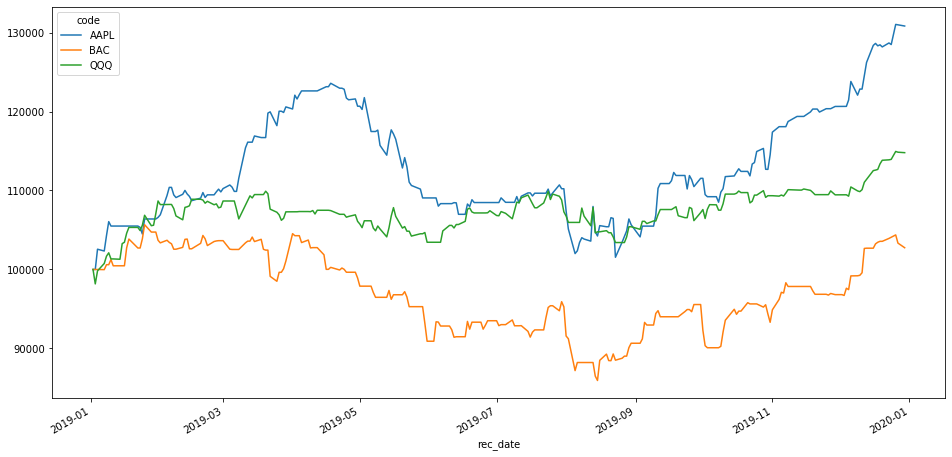

In [244]:
combined_s1 = combined_QQQ.append(combined_AAPL, ignore_index=True)
combined_s1 = combined_s1.append(combined_BAC, ignore_index=True)
combined_s1 = combined_s1.pivot(index='rec_date', columns='code', values='strategy1_value')

combined_s1.plot(figsize=(16,8))

## Strategy 2: All in when meets 2 buy signals

In [220]:
def strategy2(combined_df, start_money, n=2):
    current_money = start_money
    state = None
    trade = []
    money_state = []
    buy_action = False
    sell_action = False
    lot = 0
    buy_times = 0
    sell_times = 0
    
    combined_df['strategy2_state'] = ""
    combined_df['strategy2_value'] = 0
    for index, row in combined_df.iterrows():
        if buy_action:
            lot += int(current_money / row["open"])
            com = commission(row["open"], lot)
            current_money -= com
            current_money -= lot * row["open"]
            t = dict(index=index,
                    type="buy",
                    lot=lot,
                    commission=com,
                    price=row["open"],
                    cash=current_money,
                    current_value=current_money + lot * row["open"])
            trade.append(t)
            combined_df.at[index, 'strategy2_state'] = "buy"
            buy_action = False
        if sell_action:
            current_money += lot * row["open"]
            com = commission(row["open"], lot)
            t = dict(index=index,
                    type="sell",
                    lot=lot,
                    commission=com,
                    price=row["open"],
                    cash=current_money,
                    current_value=current_money)
            lot = 0
            trade.append(t)
            combined_df.at[index, 'strategy2_state'] = "sell"
            sell_action = False
        
        if row['predict'] == 1:
            buy_times += 1
            sell_times = 0
            if buy_times == n and state == None:
                buy_action = True
                state = "buy"
        if row['predict'] == 0:
            sell_times += 1
            buy_times = 0
            if sell_times == n and state == "buy":
                sell_action = True
                state = None
        
        current_value = current_money + lot * row["close"]
        combined_df.at[index, 'strategy2_value'] = current_value
    return trade

strategy2_QQQ = strategy2(combined_QQQ, 100000)
strategy2_AAPL = strategy2(combined_AAPL, 100000)
strategy2_BAC = strategy2(combined_BAC, 100000)

In [221]:
combined_QQQ.tail(5)

,rec_date,predict,open,high,low,close,volume,code,strategy1_state,strategy1_value,strategy2_state,strategy2_value
244,2019-12-23,1.0,212.000000,212.149994,211.630005,211.809998,23774700,QQQ,,113882,,107216
245,2019-12-24,1.0,212.000000,212.089996,211.440002,211.919998,7089000,QQQ,,113941,,107272
246,2019-12-26,1.0,212.259995,213.809998,212.229996,213.789993,17067500,QQQ,,114945,,108218
247,2019-12-27,0.0,214.539993,214.559998,213.039993,213.610001,18134100,QQQ,,114848,,108127
248,2019-12-30,0.0,213.500000,213.630005,211.160004,212.210007,21815500,QQQ,sell,114789,,107419


In [222]:
candlesticks = Candlesticks(x=combined_QQQ, state_field="strategy2_state")
candlesticks.plot()

In [223]:
combined_AAPL.tail(5)

,rec_date,predict,open,high,low,close,volume,code,strategy1_state,strategy1_value,strategy2_state,strategy2_value
244,2019-12-23,1.0,70.132500,71.062500,70.092499,71.000000,98572000,AAPL,sell,128676,,139424
245,2019-12-24,1.0,71.172501,71.222504,70.730003,71.067497,48478800,AAPL,buy,128477,,139557
246,2019-12-26,1.0,71.205002,72.495003,71.175003,72.477501,93121200,AAPL,,131025,,142324
247,2019-12-27,0.0,72.779999,73.492500,72.029999,72.449997,146266000,AAPL,,130975,,142270
248,2019-12-30,1.0,72.364998,73.172501,71.305000,72.879997,144114400,AAPL,sell,130822,,143115


In [224]:
candlesticks = Candlesticks(x=combined_AAPL, state_field="strategy2_state")
candlesticks.plot()

In [225]:
combined_BAC.tail(5)

,rec_date,predict,open,high,low,close,volume,code,strategy1_state,strategy1_value,strategy2_state,strategy2_value
244,2019-12-23,1.0,35.040001,35.189999,34.950001,35.169998,33995400,BAC,buy,103934,,117872
245,2019-12-24,0.0,35.189999,35.279999,35.119999,35.220001,13805400,BAC,,104082,buy,117956
246,2019-12-26,1.0,35.320000,35.560001,35.290001,35.520000,26992100,BAC,sell,104377,,118961
247,2019-12-27,1.0,35.700001,35.720001,35.259998,35.349998,28111300,BAC,buy,103340,,118391
248,2019-12-30,0.0,35.570000,35.650002,35.090000,35.150002,30705100,BAC,,102755,,117722


In [226]:
candlesticks = Candlesticks(x=combined_BAC, state_field="strategy2_state")
candlesticks.plot()

In [227]:
QQQ_s2_stats = trade_stats(strategy2_QQQ)
QQQ_s2_stats

{'win_proba': 0.5789473684210527,
 'loss_proba': 0.42105263157894735,
 'min_change': -5.243314939180428,
 'max_change': 4.352103608195399,
 'min_value': -6035.0454382324215,
 'max_value': 4454.101153564453}

In [228]:
AAPL_s2_stats = trade_stats(strategy2_AAPL)
AAPL_s2_stats

{'win_proba': 0.8,
 'loss_proba': 0.2,
 'min_change': -4.538386646460225,
 'max_change': 6.175126523152959,
 'min_value': -5178.629090423584,
 'max_value': 7693.550551757812}

In [229]:
BAC_s2_stats = trade_stats(strategy2_BAC)
BAC_s2_stats

{'win_proba': 0.6551724137931034,
 'loss_proba': 0.3448275862068966,
 'min_change': -8.606416924578596,
 'max_change': 7.453631159055729,
 'min_value': -9291.594567871094,
 'max_value': 7288.313851318359}

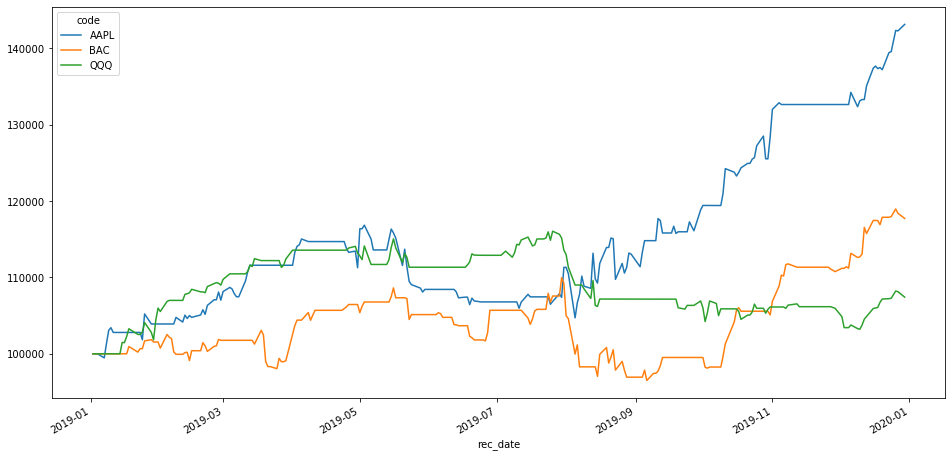

In [245]:
combined_s2 = combined_QQQ.append(combined_AAPL, ignore_index=True)
combined_s2 = combined_s2.append(combined_BAC, ignore_index=True)
combined_s2 = combined_s2.pivot(index='rec_date', columns='code', values='strategy2_value')

combined_s2.plot(figsize=(16,8))